Consider a individual who starts at position $P$ and at each step, either moves $1$ position to the right with probabilty $p$ or one to the left with probability $1-p$.

The position of the individual after $N$ steps may written as
\begin{equation*}
    S_N = \sum_{i = 1}^N X_i
\end{equation*}
where $X_i$ is a random variable taking value $\pm 1$, with $\mathbb{P}(X_i = 1) = p$ and $\mathbb{P}(X_i = -1) = q = 1 - p$.

Note that $S_N$ can be viewed as a gambler's fortune after $N$ bets, where the gambler starts with $P$ dollars and win $+1$ with probability $p$ and looses $-1$ with probability $q = 1 - p$.

100%|██████████| 10000/10000 [00:00<00:00, 1432383.03it/s]


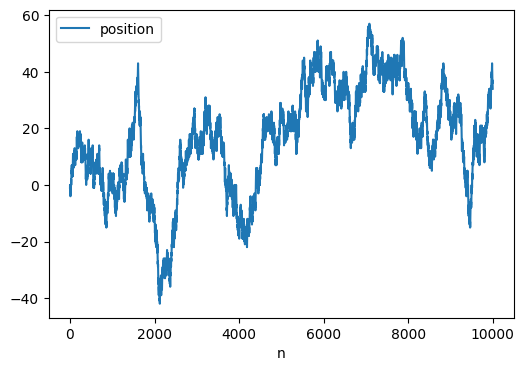

In [18]:
import random
import matplotlib.pyplot as plt

from tqdm import trange

EPOCHS = 10000
P = 0
p = 0.5

path = []
x = P

for _ in trange(EPOCHS):
    pr = random.random()
    if pr < p: x += 1
    else: x -= 1 
    path.append(x)

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(path, label="position")
plt.xlabel("n")
plt.legend()
plt.show()

Interpreting $S_N$ as a state, we can view $\lbrace S_n : n \geq 1\rbrace$ as a Markov chain. A basic question in this setup is the following: assume the individual will stop if he either reaches $-D$ or $U$, with $U, D > 0$ ($D$ for down, $U$ for up), and assume he starts at $-D < X_0 < U$. What is the probability that he will end up at position $U$ ? In other words, what is the probability he will reach $U$ before $-D$

In the gambler example, if $D = 0$, $X_0 = i > $ and $U = N > i$, then we force the gambler to either stop if he is broke or if he reaches $N$ and ask for the probability that he will end up at $N$ (i.e. not go broke).

This question can be answered using a recursive argument: let $f_P$ be the probability that the indivual will end up at position $U$ before position $-D$ when he currently is at position $P$. By assumption, we have
\begin{equation*}
    f_P = p f_{P + 1} + q f_{P - 1} \quad (-D < P < U)
\end{equation*}
with $f_U = 1$ and $f_{-D} = 0$. In particular
\begin{equation*}
    f_{P + 1} - f_P = \frac{q}{p} (f_P - f_{P - 1}) \quad (-D < P < U).
\end{equation*}
By iterating, we get
\begin{equation*}
f_{P + 1} - f_P =  \left( \frac{q}{p} \right)^{D + P} (f_{-D + 1} - f_{-D}) = \left( \frac{q}{p} \right)^{D + P} f_{-D + 1}
\end{equation*}
using the boundary condition $f_{-D} = 0$. We can now compute $f_P$ recursively. We have
\begin{equation*}
    f_{-D + 2} - f_{-D + 1} = \left( \frac{q}{p} \right)^{D + (-D + 1)} (f_{-D + 1} - f_{-D}) = \frac{q}{p} f_{-D + 1}
\end{equation*}
hence $f_{-D + 2}= (1 + \frac{q}{p}) f_{-D + 1}$ if $p \neq 1/2$ or $f_{-D + 2}= 2 f_{-D + 1}$ if $p = 1/2$. By iterating again, we obtain 
\begin{equation*}
    f_{-D + k}= f_{-D + 1} \sum_{i = 0}^{k - 1} \left( \frac{q}{p} \right)^i = f_{-D + 1} \frac{1 - \left( \frac{q}{p} \right)^{k}}{1 - \frac{q}{p}}
\end{equation*}
if $p \neq 1/2$ and
\begin{equation*}
    f_{-D + k}= k f_{-D + 1}
\end{equation*}
if $p = 1/2$.

We now use the other boundary condition to find
\begin{equation*}
    1 = f_{U} = f_{-D + (D + U)} = f_{-D + 1} \frac{1 - \left( \frac{q}{p} \right)^{D + U}}{1 - \frac{q}{p}}
\end{equation*}
hence $f_{-D + 1} = \frac{1 - \frac{q}{p}}{1 - \left( \frac{q}{p} \right)^{D + U}}$ if $p \neq 1/2$, and
\begin{equation*}
    1 = f_{U} = f_{-D + (D + U)} = (D + U) f_{-D + 1}
\end{equation*}
hence $f_{-D + 1} = \frac{1}{D + U}$ if $p = 1/2$.

Finally, we have
\begin{equation*}
    f_{P} = f_{-D + (D + P)} = \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \frac{q}{p}} f_{-D + 1} = \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \frac{q}{p}} \frac{1 - \frac{q}{p}}{1 - \left( \frac{q}{p} \right)^{D + U}} = \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}}
\end{equation*}
if $p \neq 1/2$ and
\begin{equation*}
    f_{P} = f_{-D + (D + P)} = (D + P) f_{-D + 1} = \frac{D + P}{D + U}
\end{equation*}
if $p = 1/2$.

To "verify" this statement, we can run a Monte Carlo simulation to estimate
\begin{equation*}
    \mathbb{E} \left( \mathbf{1}_{\lbrace \text{the individual reached $U$} \rbrace} \right) = \mathbb{P} ( \lbrace \text{the individual reached $U$} \rbrace).
\end{equation*}

In [19]:
EPOCHS = 10000

# parameters of the random walk
P = 0
D, U = 50, 50
p = 0.501

counter = 0
for _ in trange(EPOCHS):
    x = P
    while (-D < x < U):
        pr = random.random()
        if pr < p: x += 1
        else: x -= 1 
    if x == U: counter += 1

if p == 0.5: print(f"Estimimated probability that the indivual reaches U = {counter/EPOCHS :.04f}\nTheoretical probability that the indivual reaches U = {(D + P) / (D + U) :.04f}")
else: print(f"Estimimated probability that the indivual reaches U = {counter/EPOCHS :.04f}\nTheoretical probability that the indivual reaches U = {(1 - ((1-p) / p) ** (D + P)) / (1 - ((1-p) / p) ** (D + U)) :.04f}")

100%|██████████| 10000/10000 [00:04<00:00, 2001.74it/s]

Estimimated probability that the indivual reaches U = 0.5555
Theoretical probability that the indivual reaches U = 0.5498


Another natural question one may ask is the expected number of moves the individual does before reaching either $-D$ or $U$.

Gambler's formulation: what is the expected time before he goes broke ($-D = 0$) or rich ($U = N$).

The basic method to answer the question is with another iterative proof, namely to find the solution to the difference equation
\begin{equation*}
    E_P = p (1 + E_{P + 1}) + q (1 + E_{P - 1})
\end{equation*}
with boundary conditions $E_{-D} = 0$ and $E_{U} = 0$, where $E_P$ is the expected number of moves before reaching, say $U$, when the individual is currently at position $P$.

Another method is to construct a martingale and compute its stopping time. More precisely, consider
\begin{equation*}
    S_n = \sum_{i = 1}^n X_i
\end{equation*}
where $X_i$ are i.i.d random variables with values $+1$ or $-1$ and probabilities $\mathbb{P}(X = 1) = p$,  $\mathbb{P}(X = -1) = q = 1 - p$. Then, an interesting martingale is
\begin{equation*}
    Z_n = Y_n^2 - n \sigma^2
\end{equation*}
where $\sigma^2 = \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = (p + q) - (p - q)^2 = 1 - (2p-1)^2 = 4p(1-p)$ and
\begin{equation*}
    Y_n = S_n - n \mu
\end{equation*}
where $\mu = \mathbb{E}(X) = p - q = 2p - 1$.


Note it is indeed a martingale
\begin{align*}
    \mathbb{E}\left( Z_{n + 1} \vert Z_1, \ldots, Z_n \right)
    &= \mathbb{E}\left( Y_{n+1}^2 - (n + 1) \sigma^2 \vert Y_1, \ldots, Y_n \right) \\
    &= \mathbb{E}\left( (Y_n + (X_{n+1} - \mu))^2 - (n+1)\sigma^2 \vert YX_1, \ldots, Y_n \right) \\
    &= \mathbb{E}\left( Y_n^2 + 2 Y_n (X_{n+1} - \mu) + (X_{n+1} - \mu)^2 - (n+1)\sigma^2 \vert Y_1, \ldots, Y_n \right) \\
    &= Y_n^2 + 2 Y_n \mathbb{E}\left( (X_{n+1} - \mu)\vert Y_1, \ldots, Y_n \right) + \mathbb{E}\left( (X_{n+1} - \mu)^2 \vert Y_1, \ldots, Y_n \right) - (n+1)\sigma^2 \\
    &= Y_n^2 + 0 + \sigma^2 - (n+1)\sigma^2 \\
    &= Y_n^2 - n\sigma^2 = Z_n.
\end{align*}
If $p = 1/2$, then $Z_n = S_n^2 - n$. When $p \neq 1/2$, we need to center the process by shifting the main term $S_n$ by $n \mu$ and correct the variance by multiplying $n$ by $\sigma^2$.

We now go back to the initial question of computing the expected number of moves the individual does before reaching either $-D$ or $U$.

A very effective way to compute this expected number of moves is to apply martingale's stopping theorem.
- Case $p = 1/2$: by martingale's stopping theorem, we have
\begin{equation*}
    \mathbb{E} (Z_T) = \mathbb{E}(Z_0) = S_0^2 = P^2.
\end{equation*}
On the other hand, we have
\begin{equation*}
    \mathbb{E} (Z_T) = \mathbb{E} (S_T^2 - T) = \mathbb{E} (S_T^2) - \mathbb{E} (T)
\end{equation*}
with (applying the results about probabilities of hitting $U$)
\begin{equation*}
    \mathbb{E} (S_T^2) = U^2 \mathbb{P} (S_T = U) + (-D^2) \mathbb{P} (S_T = -D) = \frac{D + P}{D + U} U^2  + (-D)^2 (1 - \frac{D + P}{D + U}) = \frac{U^2 (D + P) + D^2(U - P)}{D + U}
\end{equation*}
hence
\begin{equation*}
   \mathbb{E} (T) = \frac{U^2 (D + P) + D^2(U - P)}{D + U} - P^2.
\end{equation*}
In particular, if $P = 0$, then $\mathbb{E} (T) = \frac{U^2 D + D^2 U}{D + U} = D U$.

- Case $p \neq 1/2$: by martingale's stopping theorem, we have
\begin{equation*}
    \mathbb{E} (Z_T) = \mathbb{E}(Z_0) = S_0^2 = P^2.
\end{equation*}
On the other hand, we have
\begin{equation*}
    \mathbb{E} (Z_T) = \mathbb{E} (Y_T^2 - T \sigma^2) = \mathbb{E} (Y_T^2) - \sigma^2 \mathbb{E} (T)
\end{equation*}
with
\begin{equation*}
    \mathbb{E} (Y_T^2) = \mathbb{E} ((S_T - T \mu)^2) = \mathbb{E} (S_T^2) + \mu^2 \mathbb{E}(T^2) - 2 \mathbb{E}(T S_T)
\end{equation*}
and
\begin{equation*}
    \mathbb{E} (S_T^2) = U^2 \mathbb{P} (S_T = U) + (-D^2) \mathbb{P} (S_T = -D) = \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}} U^2  + (-D)^2 \left(1 - \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}} \right).
\end{equation*}
The tricky part here is to compute $\mathbb{E}(T S_T)$. One can prove
\begin{equation*}
    \mathbb{E}(T S_T) = \frac{1}{2 \mu} \left( \mathbb{E}(S_T^2) + \mu^2 \mathbb{E}(T^2) - \sigma^2 \mathbb{E}(T) - P^2 \right)
\end{equation*}
by using the exponential martingale $\exp(\theta S_n - \psi(\theta))$, with $\psi(\theta) = \log( pe^{\theta} + q e^{- \theta})$ and evaluating its differential (with respect to $\theta$) at $0$.
Computing and simplifying yields
\begin{equation*}
    \mathbb{E}(T) = \frac{1}{2p - 1} \left( U \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}} - D \left(1 - \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}} \right) - P  \right).
\end{equation*}


Again, we "verify" this statement by running Monte Carlo simulation to estimate $\mathbb{E} \left( T \right)$.

In [20]:
EPOCHS = 10000

# parameters of the random walk
P = 1
D, U = 60, 75
p = 0.503

total_nb_steps = 0
for _ in trange(EPOCHS):
    nb_steps = 0
    x = P
    while (-D < x < U):
        pr = random.random()
        if pr < p: x += 1
        else: x -= 1 
        nb_steps += 1
    total_nb_steps += nb_steps

if p == 0.5: quotient = ((U ** 2 * (D + P)) + (D ** 2 * (U - P))) / (D + U)
else: quotient = (1 - (((1 - p)/(p)) ** (D + P))) / (1 - (((1 - p)/(p)) ** (D + U)))

if p == 0.5: theorical_val = quotient - (P ** 2)
else: theorical_val = 1/(2 * p - 1) * ((U * quotient) - (D * (1 - quotient)) - P)

if p == 0.5: print(f"Estimimated expected number of steps = {total_nb_steps/EPOCHS :.04f}\nTheoretical expected number of steps = {theorical_val :.04f}")
else: print(f"Estimimated expected number of steps = {total_nb_steps/EPOCHS :.04f}\nTheoretical expected number of steps = {theorical_val :.04f}")

100%|██████████| 10000/10000 [00:10<00:00, 954.78it/s]

Estimimated expected number of steps = 4410.7422
Theoretical expected number of steps = 4393.5279


One could also ask for the asymptotic behavior of the random walk. For example, what is the probability that he either stop at $-D$ or end up "at infinity" ?

Gambler's formulation: what is the probability that he end up broke or what is the probability that he ends up infinitely rich ?

The answer is simply given here by letting $U \rightarrow \infty$ in
\begin{equation*}
    \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}}
\end{equation*}
if $p \neq 1/2$ and
\begin{equation*}
    \frac{D + P}{D + U}
\end{equation*}
if $p = 1/2$, where $P$ is the starting point of the walk (or initial fortune). More precisely
\begin{equation*}
    \mathbb{P}(\text{ends up infinitely rich}) = \lim_{U \rightarrow \infty} \frac{1 - \left( \frac{q}{p} \right)^{D + P}}{1 - \left( \frac{q}{p} \right)^{D + U}} = 1 - \left( \frac{q}{p} \right)^{D + P}
\end{equation*}
if $p \neq 1/2$ and
\begin{equation*}
    \mathbb{P}(\text{ends up infinitely rich}) = \lim_{U \rightarrow \infty} \frac{D + P}{D + U} = 0
\end{equation*}
if $p = 1/2$. Conversly
\begin{equation*}
    \mathbb{P}(\text{ends up broke}) = 1 - \mathbb{P}(\text{ends up infinitely rich}) = \left( \frac{q}{p} \right)^{D + P}
\end{equation*}
if $p \neq 1/2$ and
\begin{equation*}
    \mathbb{P}(\text{ends up broke}) = 1 - \mathbb{P}(\text{ends up infinitely rich}) = 1.
\end{equation*}
if $p = 1/2$ (with "broke" meaning he ends up with \$ $-D$).

In [21]:
EPOCHS = 500

# parameters of the random walk
P = 1
D = 50
p = 0.6


u = D * 1e3 if D > 0 else 1e3
broke_count, rich_count = 0, 0
for _ in trange(EPOCHS):
    nb_steps = 0
    x = P
    while (-D < x < u):
        pr = random.random()
        if pr < p: x += 1
        else: x -= 1
        nb_steps += 1
    if x == -D: broke_count += 1
    if x == u: rich_count += 1

if p == 0.5: broke_theorical_val = 1.0
else: broke_theorical_val = ((1-p) / (p)) ** (D + P)

rich_theorical_val = 1 - broke_theorical_val

if p == 0.5:
    print(f"Estimimated probability that the gambler ends up broke = {broke_count/EPOCHS :.04f}\nTheoretical probability that the gambler ends up broke = {broke_theorical_val :.04f}")
    print(f"Estimimated probability that the gambler ends up infinitely rich = {rich_count/EPOCHS :.04f}\nTheoretical probability that gambler ends up infinitely rich = {rich_theorical_val :.04f}")

else:
    print(f"Estimimated probability that the gambler ends up broke = {broke_count/EPOCHS :.04f}\nTheoretical probability that the gambler ends up broke = {broke_theorical_val :.04f}")
    print(f"Estimimated probability that the gambler ends up infinitely rich = {rich_count/EPOCHS :.04f}\nTheoretical probability that the gambler ends up infinitely rich = {rich_theorical_val :.04f}")

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:35<00:00, 14.24it/s]

Estimimated probability that the gambler ends up broke = 0.0000
Theoretical probability that the gambler ends up broke = 0.0000
Estimimated probability that the gambler ends up infinitely rich = 1.0000
Theoretical probability that the gambler ends up infinitely rich = 1.0000


Finally, we answer the following question: starting with $i$ dollars, what is the probability that the gambler plays exactly $i + 2k$ games before being broke ?

If he plays exactly $i + 2k$ games before going broke, starting with $i$ dollars, he won $i$ times and lost $k + i$ times. If he ends up broke, it must be the first time he ends up broke, therefore
\begin{equation*}
    \mathbb{P}(\text{end up broke for the first time}) = \mathbb{P}(\text{end up broke} \vert \text{first time}) \mathbb{P}(\text{first time}) + \mathbb{P}(\text{end up broke}) \mathbb{P}(\text{first time}).
\end{equation*}
By ballot theorem, we have
\begin{equation*}
    \mathbb{P}(\text{first time}) = \frac{(k + i) - k}{(k + i) + i}.
\end{equation*}
because a "first time path to brokenness" must avoid paths with more losses than wins at each step. Then
\begin{equation*}
    \mathbb{P}(\text{end up broke}) = {(k + i) + k \choose k} p^k q^{k + i}
\end{equation*}
since we need to choose $k$ wins among $(k + i) + k$ games. Finally
\begin{equation*}
    \mathbb{P}(\text{end up broke for the first time}) = \frac{i}{2k + i} {2k + i \choose k} p^k q^{k + i}.
\end{equation*}

In [22]:
import math
EPOCHS = 100000

# parameters of the random walk
i = 5
p = 0.6
k = 15

counter = 0
for _ in trange(EPOCHS):
    x = i
    for step in range(i + 2 * k):
        pr = random.random()
        if pr < p: x += 1
        else: x -= 1

        if x <= 0: break
        
    if x == 0 and step == i + 2 * k - 1: counter += 1

theorical_val = (i / (2 * k + i)) * math.comb(2*k + i, k) * p**k * (1-p)**(k+i)
print(f"Estimimated probability = {counter/EPOCHS :.04f}\nTheoretical probability = {theorical_val :.04f}")

100%|██████████| 100000/100000 [00:00<00:00, 193565.99it/s]

Estimimated probability = 0.0024
Theoretical probability = 0.0024
